In [1]:
from typing import List
from os import listdir, path

import numpy as np
import pandas as pd
import cmcrameri.cm as cm

from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from greenlight_gym.visualisations.utils import load_data, compute_profit_eps, aggregate_data, ci, calculate_twb

In [2]:
### Latex font in plots
plt.rcParams['font.serif'] = "cmr10"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 24

plt.rcParams['legend.fontsize'] = 24
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.grid"] = False
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['axes.linewidth'] = 4   # Default for all spines
# plt.rcParams['text.usetex'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.size'] = 6  # Thicker major x-ticks
plt.rcParams['xtick.major.width'] = 2  # Thicker major x-
plt.rcParams['ytick.major.size'] = 6  
plt.rcParams['ytick.major.width'] = 2 
plt.rc('axes', unicode_minus=False)


In [3]:
data_path = '../data/ablation-study-obs/training'
filename = 'rewards.csv'
df  = pd.read_csv(path.join(data_path, filename))


In [4]:
df

,global_step,Group: multiplicative-penalty-no-daily-temp - _step,Group: multiplicative-penalty-no-daily-temp - _step__MIN,Group: multiplicative-penalty-no-daily-temp - _step__MAX,Group: multiplicative-penalty-no-daily-temp - rollout/ep_rew_mean,Group: multiplicative-penalty-no-daily-temp - rollout/ep_rew_mean__MIN,Group: multiplicative-penalty-no-daily-temp - rollout/ep_rew_mean__MAX,Group: additive-penalty-no-daily-temp - _step,Group: additive-penalty-no-daily-temp - _step__MIN,Group: additive-penalty-no-daily-temp - _step__MAX,...,Group: multiplicative-penalty - _step__MAX,Group: multiplicative-penalty - rollout/ep_rew_mean,Group: multiplicative-penalty - rollout/ep_rew_mean__MIN,Group: multiplicative-penalty - rollout/ep_rew_mean__MAX,Group: additive-penalty - _step,Group: additive-penalty - _step__MIN,Group: additive-penalty - _step__MAX,Group: additive-penalty - rollout/ep_rew_mean,Group: additive-penalty - rollout/ep_rew_mean__MIN,Group: additive-penalty - rollout/ep_rew_mean__MAX
0,34560,1.0,1.0,1.0,1156.668213,1156.668213,1156.668213,1,1,1,...,1,1155.815063,1155.815063,1155.815063,1,1,1,1084.682007,1084.682007,1084.682007
1,51840,2.0,2.0,2.0,1156.668213,1156.668213,1156.668213,2,2,2,...,2,1155.815063,1155.815063,1155.815063,2,2,2,1084.682007,1084.682007,1084.682007
2,69120,3.0,3.0,3.0,1089.146362,1089.146362,1089.146362,3,3,3,...,3,1087.805542,1087.805542,1087.805542,3,3,3,1009.887207,1009.887207,1009.887207
3,86400,4.0,4.0,4.0,1089.146362,1089.146362,1089.146362,4,4,4,...,4,1087.805542,1087.805542,1087.805542,4,4,4,1009.887207,1009.887207,1009.887207
4,103680,5.0,5.0,5.0,1063.409546,1063.409546,1063.409546,5,5,5,...,5,1061.343628,1061.343628,1061.343628,5,5,5,988.267456,988.267456,988.267456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,19941120,NaN,NaN,NaN,NaN,NaN,NaN,1404,1404,1404,...,1412,1499.252808,1499.252808,1499.252808,1442,1442,1442,1404.587036,1404.587036,1404.587036
1153,19958400,NaN,NaN,NaN,NaN,NaN,NaN,1405,1405,1405,...,1413,1499.252808,1499.252808,1499.252808,1443,1443,1443,1404.587036,1404.587036,1404.587036
1154,19975680,NaN,NaN,NaN,NaN,NaN,NaN,1406,1406,1406,...,1414,1503.049561,1503.049561,1503.049561,1444,1444,1444,1408.949097,1408.949097,1408.949097
1155,19992960,NaN,NaN,NaN,NaN,NaN,NaN,1407,1407,1407,...,1415,1503.049561,1503.049561,1503.049561,1445,1445,1445,1408.949097,1408.949097,1408.949097


In [5]:
window_size = 30
running_avg_dfs = []
columns = [ 'Group: additive-penalty - rollout/ep_rew_mean', 'Group: multiplicative-penalty - rollout/ep_rew_mean', \
           'Group: additive-penalty-no-daily-temp - rollout/ep_rew_mean', 'Group: multiplicative-penalty-no-daily-temp - rollout/ep_rew_mean']

new_col_names = ['additive-penalty', 'multiplicative-penalty', 'additive-penalty-no-daily-temp', 'multiplicative-penalty-no-daily-temp']

for i, column in enumerate(columns):
    df[new_col_names[i] + ' RA'] = df[column].rolling(window_size).mean()


In [6]:
def plot_data(ax, df, color_labels, color, columns2plot, line_labels, linestyles):
    # interate over multiplicative and additive penalty dataframe
    # iterate over the model with and without daily crop Temperature observation
    for i, col in enumerate(columns2plot):
        x = df['global_step']
        y = df[col]
        ax.plot(x, y, color=color, linestyle=linestyles[i],  linewidth=4)

    # Setting labels and formatter
    ax.set_xlabel('Time step')
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.xaxis.offsetText.set_visible(False)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
    ax.set_ylabel('Training return')
    ax.set_xlabel('Time step (millions)')

    # Creating custom legend handles
    color_handles = [mlines.Line2D([], [], color=color, label=color_labels[i], linewidth=4) for i in range(len(color_labels))]
    line_handles = [mlines.Line2D([], [], color='grey', linestyle=linestyles[j], label=line_labels[j], linewidth=4) for j in range(len(line_labels))]

    # Adding the legends
    legend1 = ax.legend(handles=color_handles, title="", loc='center right')
    legend2 = ax.legend(handles=line_handles, title=r"24h crop$_{T}$", loc='lower right')
    ax.add_artist(legend1)  # To keep the first legend

    return ax


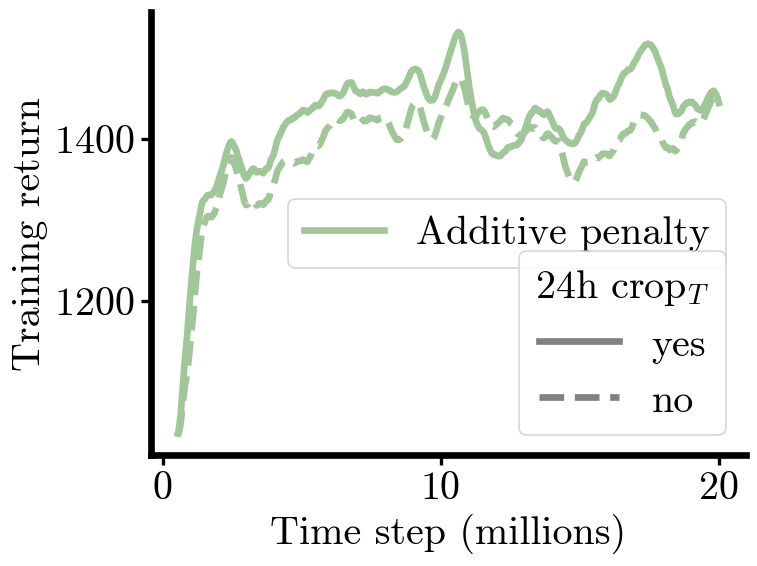

In [7]:

daily_avg_col_names = ['additive-penalty RA',  'additive-penalty-no-daily-temp RA'] #, 'Group: additive-penalty - rollout/ep_rew_mean RA']
color_labels = ['Additive penalty']
line_labels = ['yes', 'no']
linestyles = ['-', '--']
markers = ['o', 'x']
colors = [cm.tokyoS(4), cm.tokyoS(6)]

fig, ax = plt.subplots(dpi=120)

ax = plot_data(ax, df, color_labels, colors[0], daily_avg_col_names, line_labels, linestyles)

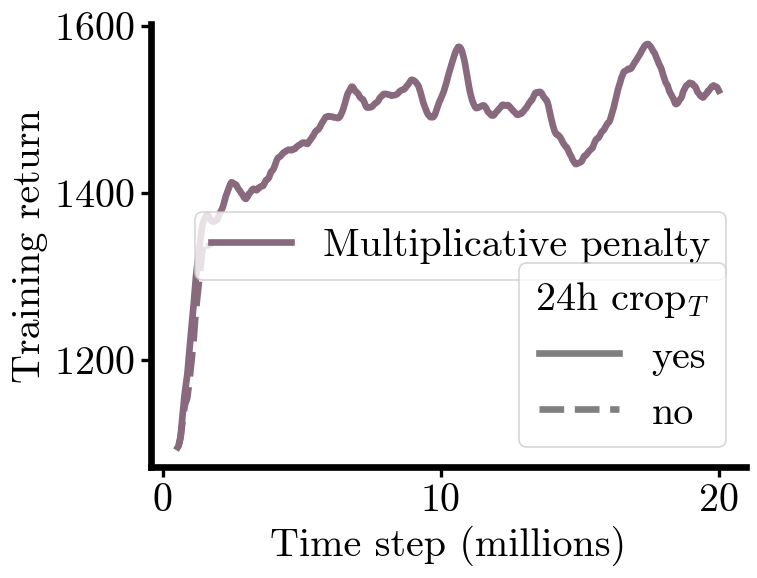

In [8]:
daily_avg_col_names = ['multiplicative-penalty RA',  'multiplicative-penalty-no-daily-temp RA'] #, 'Group: Multiplicative-penalty - rollout/ep_rew_mean RA']
color_labels = ['Multiplicative penalty']
line_labels = ['yes', 'no']
linestyles = ['-', '--']
markers = ['o', 'x']
colors = [cm.tokyoS(4), cm.tokyoS(6)]

fig, ax = plt.subplots(dpi=120)

ax = plot_data(ax, df, color_labels, colors[1], daily_avg_col_names, line_labels, linestyles)

In [9]:
def generate_grouped_bar_plot(twb_df, twb_df_ci, xlabels):
    co2color = cm.tokyoS(4)
    tcolor = cm.tokyoS(5)
    humcolor = cm.tokyoS(6)

    fig, ax = plt.subplots(dpi=120)

    index = np.arange(len(xlabels))

    bar_width = 0.2

    bars1 = ax.bar(index - bar_width, twb_df['CO2 violation'], bar_width, edgecolor='black', color=co2color, label=r'CO$_2$')
    ax.errorbar(index - bar_width, twb_df['CO2 violation'], yerr=twb_df_ci["CO2 violation"], capsize=5, linestyle='None', color='black', fmt='')

    bars2 = ax.bar(index, twb_df['Temperature violation'], bar_width, edgecolor='black', color=tcolor, label='Temperature')
    ax.errorbar(index, twb_df['Temperature violation'], yerr=twb_df_ci["Temperature violation"], capsize=5, linestyle='None', color='black', fmt='')

    bars3 = ax.bar(index + bar_width, twb_df['Humidity violation'], bar_width, edgecolor='black', color=humcolor, label='Humidity')
    ax.errorbar(index + bar_width, twb_df['Humidity violation'], yerr=twb_df_ci["Humidity violation"], capsize=5, linestyle='None', color='black', fmt='')

    ax.set_xticks(index)
    ax.set_xticklabels(xlabels)
    ax.set_ylabel('Time within boundary (%)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

def grouped_profit_plot(ax, profit_df, errors, xlabels, colors):

    hatch_labels = ['False', 'True']
    hatches = ['','/']
    bar_width = 0.3
    ax.set_ylabel(r'Profits (EU m$^{-2}$)')
    index = np.arange(len(xlabels))


    ax.bar(index - 0.5*bar_width, profit_df['Profits No Daily Avg'], width=bar_width, color=colors, edgecolor='black')
    ax.bar(index + 0.5*bar_width, profit_df['Profits Daily Avg'], width=bar_width, color=colors, edgecolor='black', hatch='/')

    ax.errorbar(index - 0.5*bar_width, profit_df['Profits No Daily Avg'], yerr=errors['Profits Daily Avg'], capsize=5, linestyle='None', color='black', fmt='')
    ax.errorbar(index + 0.5*bar_width, profit_df['Profits Daily Avg'], yerr=errors['Profits Daily Avg'], capsize=5, linestyle='None', color='black', fmt='')
    
    hatch_handles = [mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatches[i], label=hatch_label) for i, hatch_label in enumerate(hatch_labels)]
    ax.legend(handles=hatch_handles, title="24h crop Temperature", bbox_to_anchor=(1, .5), loc='center left')
    ax.set_xticks(index)
    ax.set_xticklabels(xlabels)

    fig.tight_layout()
    return ax


In [10]:
multiplicative_path =  '../data/effect-daily-avg-temp/multiplicative-penalty'

multiplicative_pen_df = load_data(multiplicative_path, 'gallant-bush-17.csv')
multiplicative_pen_df_no_daily_avg = load_data( multiplicative_path + '-no-daily-temp', 'solar-galaxy-24.csv')

additive_path = '../data/effect-daily-avg-temp/additive-penalty'

additive_pen_df = load_data(additive_path, 'stellar-frog-16.csv')
additive_pen_df_no_daily_avg = load_data( additive_path + '-no-daily-temp', 'celestial-dawn-20.csv')

xlabels = ['Multiplicative', 'Additive']

In [11]:
dfs =[[additive_pen_df_no_daily_avg, additive_pen_df], [multiplicative_pen_df_no_daily_avg, multiplicative_pen_df]]

mean_profit_df = pd.DataFrame()
ci95_profit_df = pd.DataFrame()
methods = ['Additive', 'Multiplicative']
labels = ['Profits No Daily Avg', 'Profits Daily Avg']


for j, _ in enumerate(methods):
    mean =np.array([compute_profit_eps(df).mean()['Profits'] for df in dfs[j]])
    df_profit = pd.DataFrame({methods[j]: mean,}, index=labels)
    mean_profit_df = pd.concat([mean_profit_df, df_profit], axis=1)

    ci95 = np.array([ci(compute_profit_eps(df).std()['Profits'], n=60) for df in dfs[j]])
    df_ci95 = pd.DataFrame({methods[j]: ci95,}, index=labels)
    ci95_profit_df = pd.concat([ci95_profit_df, df_ci95], axis=1)


mean_profit_df = mean_profit_df.T
ci95_profit_df = ci95_profit_df.T

In [16]:
calculate_twb(dfs[0], ['No Avg Lights', 'Avg Lights'])
# calculate_twb(dfs[1], ['No Avg Lights', 'Avg Lights'])


(               CO2 violation  Temperature violation  Humidity violation
 No Avg Lights      98.666088              98.046296           62.112847
 Avg Lights         90.359954              98.826389           64.650463,
                CO2 violation  Temperature violation  Humidity violation
 No Avg Lights       0.499178               0.944267            2.789181
 Avg Lights          2.474036               0.741829            2.933456)

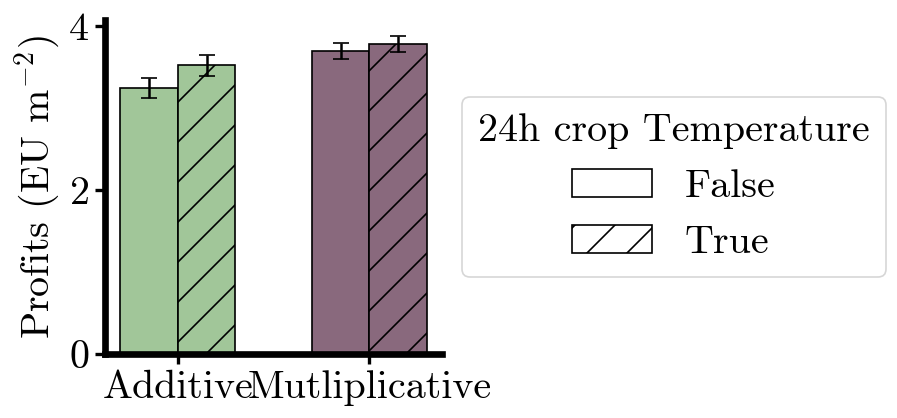

In [13]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
colors = [cm.tokyoS(4), cm.tokyoS(6)]
ax = grouped_profit_plot(ax, mean_profit_df, ci95_profit_df, xlabels=['Additive', 'Mutliplicative'], colors=colors)